In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import math

%matplotlib inline

# Mapa de Rulkov

Se simula un mapa de Rulkov como un sistema dinamico discreto de 4 variables

## Variables: 
- sigma: Emula la accion de una corriente DC bias externa sobre la neurona
- ai: Parametro de control que produce los diferentes patrones de disparo
- xi(n): Potencial trans-membrana de la i-ava neurona en el tiempo n
- yi(n): Variacion de la corriente de recuperacion ionica
- nu: Parametro positivo pequeño << 1
- gamma: Funcion sigmoidal de entrada-salida
- f: Funcion de acoplamiento interno
- gc: Fuerza de la sinapsis quimica
- e: Fuerza de acoplamiento interno
- vs: Potencial sinaptico reverso
- k: Slope de la sigmoidal
- titas: Umbral de disparo sinaptico

In [5]:
#Constants
a = 4.1
nu = 0.001
sigma = -1.6
vs = -1.4
k=50
titas = -1.4
e=0.5
gc = 1.0

#Functions
def f(x, y):
    return a/(1 + x**2) + y

def gamma(x):
    return 1/(1 + math.exp(-1*k*(x-titas)))

def next_x1(x1, y1, x2, y2): 
    return f(x1, y1) + gc*(vs-x1)*gamma(x2) + e*(f(x2,y2)-f(x1,y1))

def next_y1(x1, y1):
    return y1 - nu*(x1-sigma)

def next_x2(x1, y1, x2, y2):
    return next_x1(x2, y2, x1, y1)

def next_y2(x2, y2):
    return next_y1(x2, y2)




In [21]:
%%time 

steps = int(1e2)
data1 = np.zeros([steps,2])
data2 = np.zeros([steps,2])

for i in range(steps-1):
    data1[i+1][0] = next_x1(data1[i][0], data1[i][1], data2[i][0], data2[i][1])
    data1[i+1][1] = next_y1(data1[i][0], data1[i][1])
    data2[i+1][0] = next_x2(data1[i][0], data1[i][1], data2[i][0], data2[i][1])
    data2[i+1][1] = next_y2(data2[i][0], data2[i][1])


CPU times: user 3.2 ms, sys: 0 ns, total: 3.2 ms
Wall time: 3.22 ms


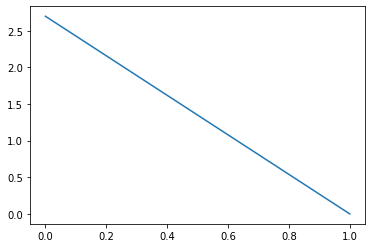

In [24]:
mp.plot(data1[1])